<a href="https://colab.research.google.com/github/RajaKathireshh/NFTsDataAnalysis/blob/main/NFTChallenge_Crawl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

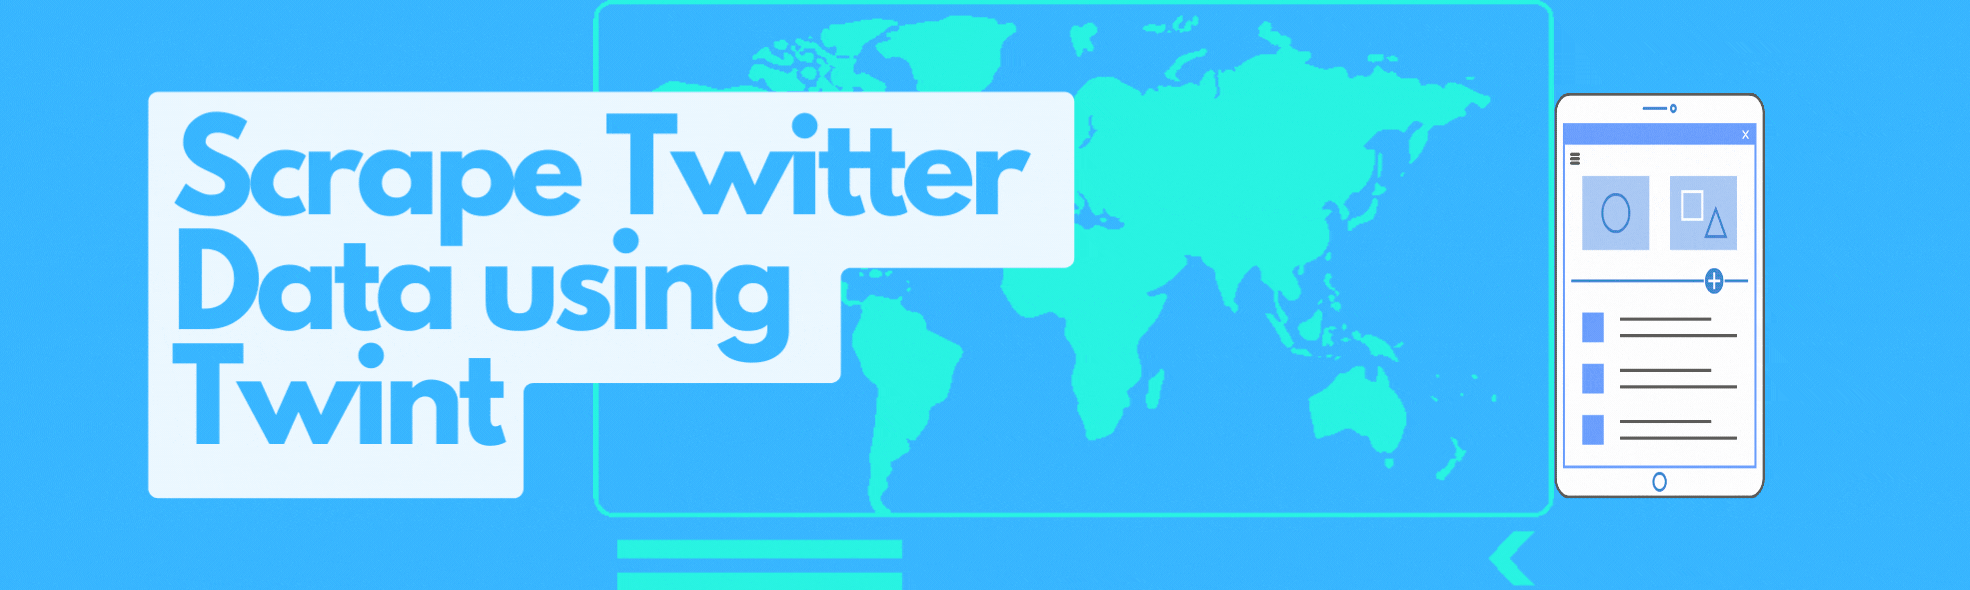

<h1><u><b> Scraping Twitter data based on keywords using Twint 🥳 ✌ </b></u> </h1> 



**aiohttp** is an HTTP client/server for asyncio. </br>
It allows you to write asynchronous clients and servers. </br>
We have to install this because twint library supports only aiohttp 3.7 version.  

In [ ]:
pip install aiohttp==3.7.0

<h2>Installing twint</h2> 
<b>TWINT</b> is an advanced Twitter scraping tool written in Python that allows for scraping Tweets from Twitter profiles without using Twitter's API. 

In [ ]:
!pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Obtaining twint from git+https://github.com/twintproject/twint.git@origin/master#egg=twint
  Updating ./src/twint clone (to revision origin/master)
  Running command git fetch -q --tags
  Running command git reset --hard -q origin/master
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21
  Running setup.py develop for twint


After installing twint, we have to import twint.</br>
This might end up throwing Error 🤐 </br>
Don't panic ❌, simply **restart runtine** and execute from first. It will import now without any error ✔️

In [ ]:
import twint

Install datetime module ⏰ </br>
This is not mandatory but do it to avoid requirement conflicts 💯 

In [ ]:
!pip3 install datetime

     |████████████████████████████████| 51 kB 325 kB/s 
     |████████████████████████████████| 251 kB 5.4 MB/s 


Only installing is not enough 😂 </br>
We have to import it as well 🤗

In [ ]:
import datetime

**asyncio** does not allow its event loop to be nested. This presents a practical problem: When in an environment where the event loop is already running it’s impossible to run tasks and wait for the result. Trying to do so will give the error “*RuntimeError: This event loop is already running*”. </br>
So, **nest_asyncio** will allow event loops to be nested!

In [ ]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

<h2>This is the main code for scraping 😵 </h2>
 I interatively ran all keywords for 5 months [nov-feb]


In [ ]:
e = twint.Config() # 'e' is handle which interacts between the twint and our code.

import pandas      # pandas to store our scraped data

twt_df1 = pandas.DataFrame(columns=['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest']) #These all the list of columns that twint will return 

# The keyords that we want to search and scrape
list = ['#nft','#NFTs','#NFTCommunity','#NFTCollection','#nfts giveaway','NFT',\
        'nft','#nftart','#nftartist','#nftcollector','#NFTProject','#nftdrop']

month = 8
year = '2021'

def month_converter(month):     
  if(month==0): 
    month=12
  if(len(str(month)))<2:
    return '0'+str(month)
  else:
    return str(month)

def year_converter(month):
  if(month<8 and month!=0):
    return '2022' 
  else:
    return '2021'


for search_term in list[0]:       
 month=8
 while(month!=2): 
  month = (month+1)%12
  n_month = month_converter(month)
  year= year_converter(month)
  if(month == 4): break

################################
  if(n_month == '03'):   # For current month i.e. March till 17th.
   for i in range(1,18):
    new_date = year+'-'+n_month+'-'+str(i) 
    e.Since ='2021-09-01'   # Since doesn't work in twint. It is just to make the code perfect. 
    e.Until = new_date      # Until only works. We iteratively change it. 
    e.Search = search_term  # The keyword that has to be searched for scraping.
# Run
    e.Limit = 1000    
    e.Pandas = True
    e.Debug = True
    twint.run.Search(e)
# Store in DataFrame
    twt_df1 = pandas.concat([twt_df1, twint.storage.panda.Tweets_df], ignore_index=True, sort=False)
####################################
  elif(n_month == '02'):   # For feb month, otherwise while running for 29 and 30, it throws error.
   for i in range(1,27):
    new_date = year+'-'+n_month+'-'+str(i) 
    e.Since ='2021-09-01'
    e.Until = new_date
    e.Search = search_term
# Run
    e.Limit = 1000
    e.Pandas = True
    e.Debug = True
    twint.run.Search(e)
# Store in DataFrame
    twt_df1 = pandas.concat([twt_df1, twint.storage.panda.Tweets_df], ignore_index=True, sort=False)


  else:
   for i in range(1,31):
    new_date = year+'-'+n_month+'-'+str(i) 
    e.Since ='2021-09-01'
    e.Until = new_date
    e.Search = search_term
# Run
    e.Limit = 1000
    e.Pandas = True
    e.Debug = True
    twint.run.Search(e)
# Store in DataFrame
    twt_df1 = pandas.concat([twt_df1, twint.storage.panda.Tweets_df], ignore_index=True, sort=False)

 
 

I Ran this to collect the data for March, 2022. </br>

Twint collects more data for nearer days (~ within a week) and less data for past dates (~ within 5 months). 

The main purpose for running this separately is because the colab gets irresponsive and restarts automatically if we run it for long time. 

In [ ]:
for i in range(2,19):
    new_date = '2022-03-'+str(i) 
    e.Since ='2021-09-01'
    e.Until = new_date
    e.Search = list[2]
# Run
    e.Limit = 1000
    e.Pandas = True
    e.Debug = True
    twint.run.Search(e)
# Store in DataFrame
    twt_df1 = pandas.concat([twt_df1, twint.storage.panda.Tweets_df], ignore_index=True, sort=False)

1501702382165446657 2022-03-09 23:32:02 +0000 <GelisTovar> Porque perdemos inversión??🤔 Por tener poca información y miedo de quedarnos fuera y somos motivados por el FOMO   Creo que todos tenemos nuestras experiencias!! #Bitcoin #NFTCollection #NFTCommunity
1501702373768638465 2022-03-09 23:32:00 +0000 <Unkle_legacy> Let’s see some fire #NFTs drop em below ⬇️ I’ll RT to support 😀.  #NFTCommunity #nftcollectors #NFTdrops
1501702334266720256 2022-03-09 23:31:51 +0000 <Lilith_NFTS> How are you #NFTCommunity ? 😎👍🏻
1501702308924641289 2022-03-09 23:31:45 +0000 <marketing_verse> Are you already on our discord and telegram channel?🚀   https://t.co/L8pQGP8Fix   https://t.co/1G4H24boma  🔥PRESALE: 26/03/22🔥  #SolanaGiveaway #NFTs #SolanaNFTs  #NFTCollection  #NFTCommunity  #Metaverse #Solananfts
1501702294454292480 2022-03-09 23:31:41 +0000 <RWezenaar> ⚡ Rare Artwork ⚡  ⚡⚡ "Q Boy Electric" ⚡⚡  Who will give this gem a new home? 👀 ➡ 50% of sales will go back into the #NFTCommunity  👇 click 👇  ht

Obtain basic information about the DataFrame! 📢

In [ ]:
twt_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1267 non-null   object 
 1   conversation_id  1267 non-null   object 
 2   created_at       1267 non-null   float64
 3   date             1267 non-null   object 
 4   timezone         1267 non-null   object 
 5   place            1267 non-null   object 
 6   tweet            1267 non-null   object 
 7   language         1267 non-null   object 
 8   hashtags         1267 non-null   object 
 9   cashtags         1267 non-null   object 
 10  user_id          1267 non-null   object 
 11  user_id_str      1267 non-null   object 
 12  username         1267 non-null   object 
 13  name             1267 non-null   object 
 14  day              1267 non-null   object 
 15  hour             1267 non-null   object 
 16  link             1267 non-null   object 
 17  urls          

To scrape on one particular day !! 

In [ ]:
new_date = '2022-03-19' 
e.Since ='2021-09-01'
e.Until = new_date
e.Search = list[3]
# Run
e.Limit = 1000
e.Pandas = True
e.Debug = True
twint.run.Search(e)
# Store in DataFrame
twt_df1 = pandas.concat([twt_df1, twint.storage.panda.Tweets_df], ignore_index=True, sort=False)

1504879723381497856 2022-03-18 17:57:40 +0000 <RaoulsWorld> @WideWood1984 @BoredApeYC @edynproject The bar keeps being raised…. 🔥🙌🏽  This project has my full attention!!! Still early and WL starts this week 💥💥💥  #BlueChipNFT #NFT #NTFs #NFTCollection
1504879722530054155 2022-03-18 17:57:39 +0000 <Golgoth406> Enchanted Woodland #NFT #NFTCommunity #NFTCollection #nftcollector #NFTartists #NFTartwork #NFTdrops   https://t.co/y1e98WOGuw via @opensea  https://t.co/qAUZURiHhP
1504879717119414277 2022-03-18 17:57:38 +0000 <NftFino> The crypto homeless #NFTs  is on  @opensea   https://t.co/wNkbYmdzQw  #nftcollection #NFT #NFTartist #NFTCommunity #NFTProject #opensea #nftart #NFT  https://t.co/WmZY7CpMb9
1504879676300300290 2022-03-18 17:57:28 +0000 <iwanxa11> Check out this item on OpenSea  https://t.co/N9rAbyyfLO lewat @opensea #NFTs #NFT #NFTCommunity #NFTCollection #NFTdrop
1504879666246606850 2022-03-18 17:57:26 +0000 <MasyNFTdesigner> Check out My New Collection on @opensea  https://t.co/

📄 To save the DataFrame as a CSV File..

In [ ]:
twt_df1.to_csv('nft.csv')

<h1 align='center'>Thank you 😘 🙏</h1>
<h2 align='center'> 🔔 Hope this helped you 👍 </h2>
